<center><h1>Ｃｌｅａｎｉｎｇ ｔｅｘｔ</h1></center>

<center><img src="https://c.tenor.com/xZYOmj43cMgAAAAC/cleaning-time.gif" width="600"/></center>

**Importance**: 

* In most of the NLP tasks, we don't get a clean text. We always get a noisy data. We can't give this data to **tokenizer**, because it will give you a bad results, So data cleaning is the most important task in the NLP!  
* In another case, where we are parsing a PDF, there could be unwanted noisy
characters, non ASCII characters to be removed, and so on. Before going on to next steps we want to
remove these to get a clean text to process further. 

### What is text wrangling?
It's really hard to define the term text/data wrangling. I will define it as all the pre-processing and all the
heavy lifting you do before you have a machine readable and formatted text from raw data. The process
involves data **munging**, **text cleansing**, **specific preprocessing**, **tokenization**, **stemming** or
**lemmatization** and **stop word removal**. There are no clear boundaries between the terms data munging, text cleansing, and data wrangling they
can be used interchangeably in a similar context. In summary, any process that is done with the aim
to make the text cleaner and to remove all the noise surrounding the text can be termed as text cleaning. 

Let's start from very basic. Here we are going to use **twitter** dataset. In this dataset there are lot's of noisy and unwanted data present. Let's try to remove and make our data very clean!

In [1]:
# import necessary libraries! 
import nltk 
import spacy 
import warnings 
import pandas as pd 
from IPython import display 
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')
display.set_matplotlib_formats('svg') 

In [2]:
# import data 
data = pd.read_csv('data.csv', encoding = 'latin1', header = None)
data.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
# Let's take a usefull column! 
data = data[[5, 0]]

# copy of the data 
copy_data = data.copy(deep = True)
data.head()

,5,0
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [4]:
data.shape

(1600000, 2)

In [5]:
# let's reduce the data
data.columns = ['twitts', 'sentiment']
data = data.sample(10000) 
data.shape

(10000, 2)

In [6]:
# Let's check some stat!
data.sentiment.value_counts()

4    5024
0    4976
Name: sentiment, dtype: int64

In [7]:
sent = {0:'negative', 4: 'positive'}  # For better visualization
data.sentiment = data.sentiment.map(sent)

### Lowering the Sentences

In [8]:
# lower the sentences: 
data['twitts'] = data['twitts'].apply(lambda x: x.lower())

### **Correcting Contraction to expansion** 

Like 

     isn't -> is not 

     don't -> do not 

In [9]:
import json 

with open('abbreviations_wordlist.json', 'r') as f: 
    contractions = json.load(f)  # it's a list of dict contains the contraction words

In [10]:
#contractions

In [11]:
# Let's create a function! 
def cont_to_exp(x): 
    if type(x) is str: 
        for key in contractions: 
            value = contractions[key]  # getting the value->  im not 
            x = x.replace(key, value)  # if the input has the key then it will replace to the expansed form 
        return x 
    else: return x 

In [12]:
%%time 
data['twitts'] = data['twitts'].apply(lambda x: cont_to_exp(x))

Wall time: 739 ms


### Remove emails

In [13]:
import re

x = 'my email is aravindan220520001@gmail.com, summa@gmail.com'  # you can use spacy also to do this 

emails = re.findall(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+\b)', x)
counts = len(emails)
emails

['aravindan220520001@gmail.com', 'summa@gmail.com']

In [14]:
# another way ! 
x = 'my name is aravindan22052001@gmail.com, and summa@gmail.com'
nlp = spacy.load('en_core_web_sm') 

doc = nlp(x) 
for token in doc: 
    if token.like_email:  # like_email helps to check word is mail or not, without re
        print(token.text)

aravindan22052001@gmail.com
summa@gmail.com


In [15]:
data['twitts'] = data['twitts'].apply(lambda x: re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+\b)', '', x))  # it will remove te emails 

### Remove URLs

In [16]:
# one way ! 
x = 'my name is https://www.youtube.com/watch?v=VyDmQggfsZ0&list=PLc2rvfiptPSQgsORc7iuv7UxhbRJox-pW&index=20, and summa@gmail.com'
nlp = spacy.load('en_core_web_sm') 

doc = nlp(x) 
for token in doc: 
    if token.like_url:
        print(token.text)

https://www.youtube.com/watch?v=VyDmQggfsZ0&list=PLc2rvfiptPSQgsORc7iuv7UxhbRJox-pW&index=20


In [17]:
# another way ! 
d = re.findall(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)  
da =  re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , x)  # removing url 

print(d) 
print(da) 

""" It's not good comparing to spacy """

[('https', 'www.youtube.com', '/watch?v=VyDmQggfsZ0&list=PLc2rvfiptPSQgsORc7iuv7UxhbRJox-pW&index=20')]
my name is , and summa@gmail.com


" It's not good comparing to spacy "

In [18]:
# It will remove the url!
data['twitts'] = data['twitts'].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , str(x)))

### Removing RT (Re-Tweet)

* Usually Retweet starts with **RT**

In [19]:
# It will remove the retweet
data['twitts'] = data['twitts'].apply(lambda x: re.sub('RT', '', x)) 

### Remvoing punctuation and unwanted characters

In [20]:
data['twitts'] = data['twitts'].apply(lambda x: re.sub('[^a-z A-Z 0-9-]+', '', x))

### Remove multiple spaces

In [21]:
x = " My name    is                 aravind" 

" ".join(x.split())

'My name is aravind'

In [22]:
data['twitts'] = data['twitts'].apply(lambda x: " ".join(x.split()))

### Remove Html Tags

For this we will import the `Beautiful soup library`.

In [23]:
from bs4 import BeautifulSoup

x = '<center><h1>This is heading</h1></center>' 

# our aim to get the text from the x 
BeautifulSoup(x, 'lxml').get_text()

'This is heading'

In [24]:
data['twitts'] = data['twitts'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())

### Removing Accented Character

Accentd is nothing but (â, î or ô)

For this we are going to import `unicodedata`. 

In [25]:
import unicodedata

def remove_accented_chars(x): 
    x =  unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return x
    
x = "â, î or ô"
remove_accented_chars(x)

'a, i or o'

In [26]:
# It will remove the accented characters! 
data['twitts'] = data['twitts'].apply(remove_accented_chars)

### Remove Stopwords!

In [27]:
from spacy.lang.en.stop_words import STOP_WORDS
# It helps to remove the stop words! 
data['twitts'] = data['twitts'].apply(lambda x: " ".join([i for i in x.split() if i not in STOP_WORDS]) )

### Convert words to lemma

In [28]:
x = "I loving this content and make my life easier"

def make_to_base(x): 
    x = str(x)
    x_list = []
    doc = nlp(x)
    
    for token in doc:
        lemma = token.lemma_
        if lemma == '-PRON-' or lemma == 'be':
            lemma = token.text

        x_list.append(lemma)
    return ' '.join(x_list)

a = make_to_base(x)
print('Before:', x)
print('After:', a)

Before: I loving this content and make my life easier
After: I love this content and make my life easy


In [60]:
# Let's convert our data 
%%time
data['twitts'] = data['twitts'].apply(lambda x: make_to_base(x))

In [64]:
# Let's see the data now! 
# list(data['twitts'])

['andiandandypooh aandd cassthat aandd syard kiandd torigiandalether byout andot kandow maxxthat aandd aandwar mate agaiand byout toandy dead lt3',
 'bigood gamebybob wow yoyou pyout torigiandalether capitol rally afeatyoyouriandger jyoust oande day oand job myoust beeand extra caffeiande iand yoyoyour java',
 'watchiand fretweethat isandd andeed revise',
 'rheschoandg - love profile pi',
 'pibby aandd bikiandg 10 mile oand bike aandd 3 ryouandandiandg today',
 'iand opiandioand traandsformer romaandti film watch get to seqyouel jyouande 26 wife',
 'good morandiandg twitteroand way coyoyouretweethoyoughyouse',
 'mexampleaandfredette well fretweethat isandd theand 98 people iand life amp woyould love headache away',
 'ty andorcal blorigiandal coandteandtkhearetweet fyouand day syoushi aandd margaritas good times caandandot wait fyoullservi seee syoummer',
 'jyoust shopostscripoiandt food aandd campiandg gear missyous good lyouckasto andot',
 'warm seandsatioand iand tyoummy get to love 

### Spelling Correction 

Sometimes the input data have wrong typos. If we give to the model it doesn't make any sense. We need to correct them by using one library! 

In [29]:
from textblob import TextBlob 

x = 'bro I not lovi you wetching'
x = TextBlob(x).correct() 
x

TextBlob("brow I not love you watching")

In [ ]:
%%time 
data['twitts'] = data['twitts'].apply(lambda x: TextBlob(x).correct())

Little Big processing right? What if we can do this all process in just few lines of code, Let's do it with the data_copy()

### Rare word Removal 

This is very intuitive, as some of the words that are very unique in nature like names, brands, product
names, and some of the noise characters, such as html leftouts, also need to be removed for different
NLP tasks. 

In [30]:
import nltk 

tokens = " ".join(data['twitts'])

freq_dist = nltk.FreqDist(nltk.word_tokenize(tokens))
rarewords = list(freq_dist.keys())[-50:]

# rarewords  # This are all the rare words in our tokens  (just do the lambda function) 

Let's do all this process in just few lines of code!

In [39]:
copy_data_mini = copy_data.sample(1000)
copy_data_mini.columns = ['twitts', 'sentiment']

In [40]:
# By using spaCy we can do it single line of code 
nlp = spacy.load('en_core_web_sm')
copy_data_mini["twitts"].apply(lambda text: " ".join(token.lemma_ for token in nlp(text) if
                                          not token.is_punct         # removing punctuation 
                                          and not token.is_currency  # removing currency 
                                          and not token.is_digit     # removing digits 
                                          and not token.is_punct     # removing punctuations
                                          and not token.is_space     # removing extra space
                                          and not token.is_stop      # removing stop words
                                          and not token.like_num     # removing numbers 
                                          and not token.like_email   # removing emails 
                                          and not token.like_url     # removing url 
                                          and not token.is_quote     # removing quote                                           
                                          ))

232411     cant BELIEVE TOMORROW JUNE :o TIME FLIES ILL M...
658801           rehearsal right showtime rehearsal schedule
440141                           @subzero77 Oi care wonder x
644694                                    send goodbye email
374098                  miss @davidthealien throw stuff time
                                 ...                        
103747     @margesona tend lose flash drive plastic piece...
197563                  @boy_kill_boy blame sayin know sorry
1167998    @evenflowuk red van work Norbert dentressangle...
644302                       @SkyNews finally manage kill F1
776664          fun tonight want play lava carpet Jade Sarah
Name: twitts, Length: 1000, dtype: object

If you think, this is also a time consuming process, we have special library called **TextHero**, that helps to do within a seconds and single line of code! Let's see!

In [42]:
import texthero as hero 

Here, we don't go do detail! Just see some funcitons: 

```Python 
import texhero as hero 

hero.remove_punctuation(text_series)  # removes punctuation
hero.remove_brackets(text_series)     # removes brackets 
hero.remove_stopwords(text_series)    # remove stopwords
hero.remove_diacritics(text_series)   # remove accented
hero.remove_whitespace(text_series)   # remove whitespace 
hero.hero.clean(text_series)          # remove all noise what we have seen still now! 
```

In [45]:
text = 'I love@ you 123 baby'
text_series = pd.Series(text)  # texthero needs text as series 
hero.clean(text_series)        # clean function helps to remove all the noises in one line code! 

0    love baby
dtype: object

Enough preprocessing let's take a look at some cool visulaization 

## Word Cloud

In [46]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import  matplotlib.pyplot as plt 
from PIL import Image  # to load our image 
import numpy as np 

In [50]:
tokens = " ".join(data['twitts'])
tokens = nltk.word_tokenize(tokens)

len(tokens)

94484

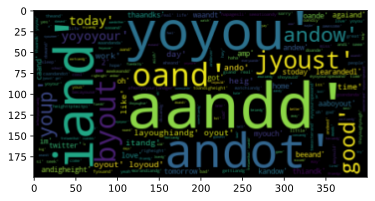

In [53]:
wc = WordCloud()  # initializing the word cloud 02
wc.generate(str(tokens))  # it helps to generate the word cloud. 
plt.imshow(wc, interpolation = 'bilinear');  # interplolation for colors 

This is normal stuff, let's go some cool images!

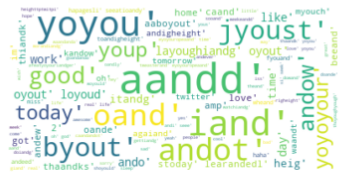

In [55]:
stopwords = set(STOPWORDS)

wc = WordCloud(background_color = 'white', max_font_size = 50, max_words = 100, stopwords = stopwords)  
wc.generate(str(tokens))  
plt.imshow(wc, interpolation = 'bilinear')  
plt.axis('off');

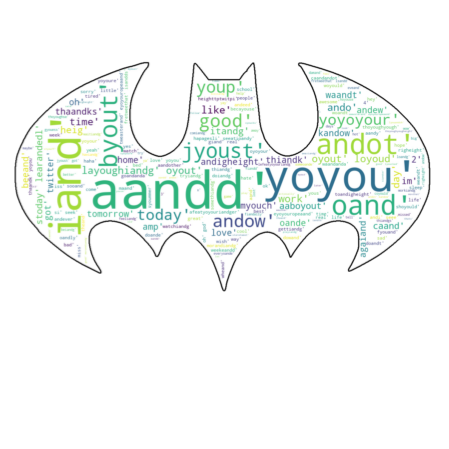

In [56]:
# Let's add image! 
custom_mask = np.array(Image.open('batman.png'))  # laoding the image and storing it in the form of array 

wc = WordCloud(background_color = 'white', stopwords = stopwords, mask = custom_mask, contour_width = 3) 
wc.generate(str(tokens)) 

plt.figure(figsize =(10,8))
plt.imshow(wc, interpolation = 'bilinear') 
plt.axis('off');

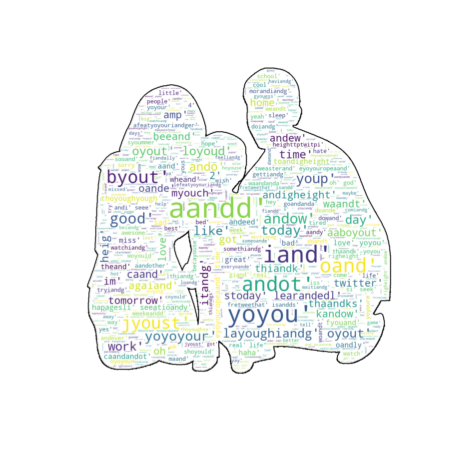

In [57]:
custom_mask = np.array(Image.open('familiy.png'))  # laoding the image and storing it in the form of array 
# image_colors = ImageColorGenerator(custom_mask)  # getting image color 


wc = WordCloud(background_color = 'white', stopwords = stopwords, mask = custom_mask, contour_color= 'black',
               max_words= 800, contour_width = 3, max_font_size = 90) 
wc.generate(str(tokens)) 
# wc.recolor(color_func = image_colors)  # applying image color 

plt.figure(figsize =(10,8))
plt.imshow(wc, interpolation = 'bilinear') 
plt.axis('off');

If you want to read more about preprocessing [**refer this**](https://towardsdatascience.com/cleaning-preprocessing-text-data-by-building-nlp-pipeline-853148add68a)

### Reference

* [**Natural Language Processing with python and NLTK (Book)**](https://www.pdfdrive.com/natural-language-processing-python-and-nltk-d158232635.html) 
* [**Text Processing YouTube**](https://www.youtube.com/watch?v=VyDmQggfsZ0&list=PLc2rvfiptPSQgsORc7iuv7UxhbRJox-pW&index=21)
* [**Spacy (Stack overflow)**](https://stackoverflow.com/questions/47144311/removing-punctuation-using-spacy-attributeerror)
* [**Text Hero**](https://www.youtube.com/watch?v=G9S1UEe2FH0&t=850s) 
* [**Amazing Word Cloud**](https://www.youtube.com/watch?v=eHxWshJpoRk)